
## $\hspace{70pt}$Data Visualization and Analytics Lab (CSP451-3)
## $\hspace{120pt}$ Practical 4

### Name :Vinni Fengade
### Roll No. :67

## Aim: Write a program in python to perform logistic regression.

#### Perform logistic regression on the credit card dataset
#### a) Download credit card fraud detection dataset using
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
#### b) Load the dataset, visualize it, show the data headers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Visualize the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### c) Preprocess the dataset if required
#### i. Check duplicate data. If found remove it.

In [2]:
data.drop_duplicates(inplace=True)

#### ii. Remove such colums which are not important. For example: Time

In [3]:
data.drop(columns=['Time'], inplace=True)

#### iii. Separate the dataset into feature column and target column. The class column is the target column and everything else is a feature.

In [4]:
X = data.drop(columns=['Class'])  # Feature columns
y = data['Class']  # Target column

#### iv. Scale the dataset using standard scaling mechanism.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### v. Partition dataset into training and testing set as 80%-20%

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### d) Plot histograms/heatmaps to understand the values of each variable.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

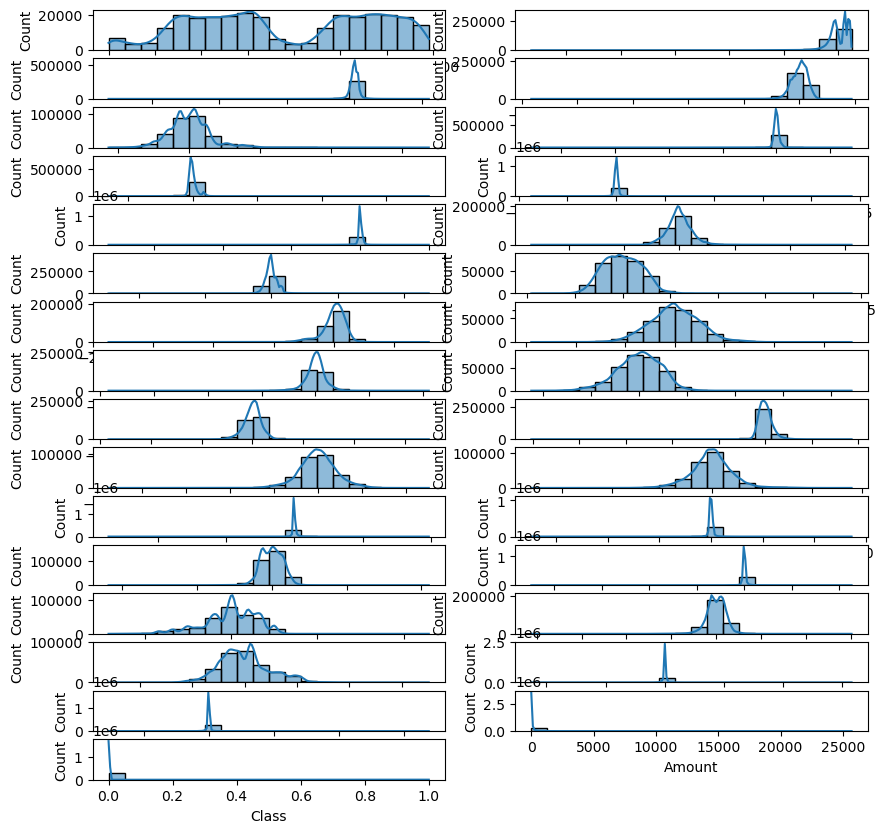

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your data
# If you don't have a DataFrame, you can create one from a CSV file, for example:
df = pd.read_csv("creditcard.csv")

# Plot histograms for each numerical variable
plt.figure(figsize = (10,10))
numerical_columns = df.select_dtypes(include='number').columns
for i,col in enumerate(numerical_columns):
#     plt.figure(figsize=(4, 3))
    plt.subplot(16,2,i+1,)
    sns.histplot(df[col], bins=20, kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

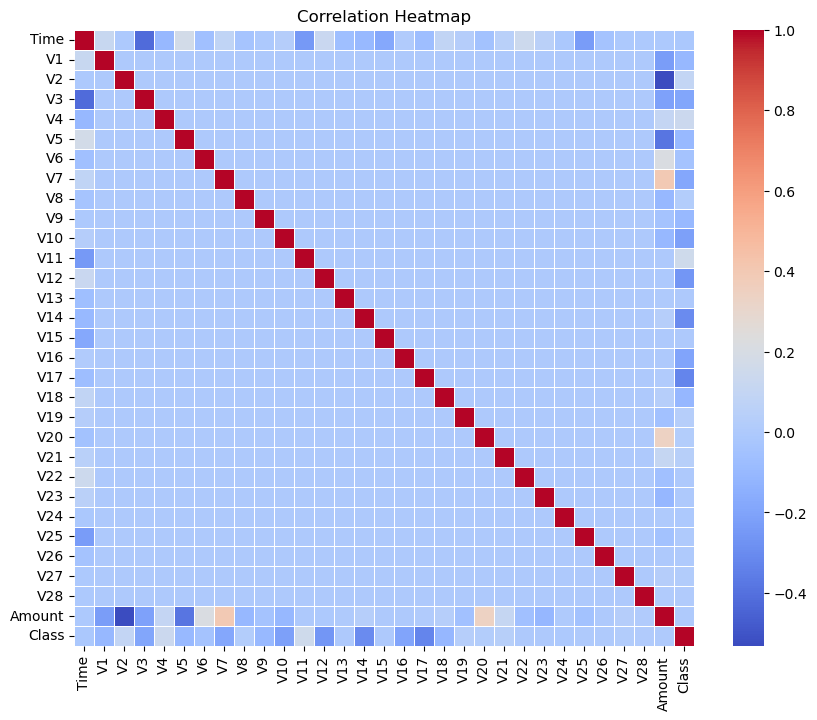

In [11]:
# Create a heatmap to visualize correlations between numerical variables
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### e) Train the model using logistic regression.

In [12]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### f) Obtain the training accuracy.

In [13]:
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


#### g) Test the model. Obtain the testing accuracy.

In [14]:
test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Testing Accuracy: 1.00


#### h) Generate confusion matrix, precision and recall based on TP, FP, FN, TN.#### 

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[56650     6]
 [   41    49]]
Precision: 0.89
Recall: 0.54
